# Simulation and Modeling

* Analytical vs Numerical Solutions: https://machinelearningmastery.com/analytical-vs-numerical-solutions-in-machine-learning

## The SIR Epidemic Model (analytical solution)

* N is the population size 
* S(t) is the number of susceptible individuals as a function of time (not yet infected)
* I(t) is the number of infectious individuals as a function of time (currently infected and transmitting disease)
* R(t) is the number of removed individuals as a function of time (recovered+immune or dead)
* β  describes the effective contact rate of the disease
* γ  is the mean recovery rate

    $\frac{dS}{dt} = -\beta\frac{SI}{N}$  
    $\frac{dI}{dt} = \beta\frac{SI}{N} - $γ$I$  
    $\frac{dR}{dt} = \gamma I$  
    
See: https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model

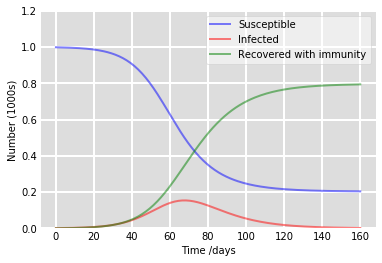

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1.0/10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

## The Gillespie SIR Epidemic Model (numerical solution)

See: https://en.wikipedia.org/wiki/Gillespie_algorithm

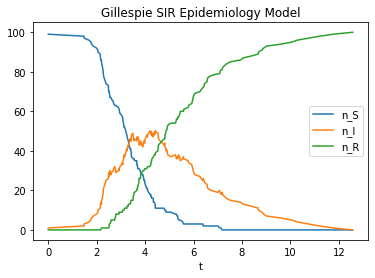

In [2]:
import math
import random
import pandas as pd
import matplotlib.pyplot as plt

N = 100       # size of population
T = 100.0     # maximum elapsed time
t = 0.0       # start time
V = 100.0     # spatial parameter
_alpha = 2.0 # rate of infection after contact
_beta = 0.5   # rate of removal (recover or death)
n_I = 1       # size of  initial infected population
n_S = N - n_I # calculate susceptible population
n_R = 0       # set recovered to zero

# Initialize results list
SIR_data = []
SIR_data.append((t, n_S, n_I, n_R))

while t < T:
    if n_I == 0:
        break
    w1 = _alpha * n_S * n_I / V
    w2 = _beta * n_I
    W = w1 + w2
    dt = -math.log(random.uniform(0.0, 1.0)) / W
    t = t + dt
    if random.uniform(0.0, 1.0) < w1 / W:
        n_S = n_S - 1
        n_I = n_I + 1
    else:
        n_I = n_I - 1
        n_R = n_R + 1
    SIR_data.append((t, n_S, n_I, n_R))

df = pd.DataFrame(SIR_data)
df.columns = ["t", "n_S", "n_I", "n_R"]
df.plot(x ='t', y='n_S', kind = 'line', title="Gillespie SIR Epidemiology Model")
df.plot(ax=plt.gca(), x ='t', y='n_I', kind = 'line')
df.plot(ax=plt.gca(), x ='t', y='n_R', kind = 'line')